## 405 Final Project

In [33]:
import json
import matplotlib.pyplot as plt
import numpy as np
idx_class_map = {
    0: 'BCC',
    1: 'VASC',
    2: 'DF',
    3: 'BKL',
    4: 'AKIEC',
    5: 'MEL',
    6: 'NV'
}



## Confusion Matrix

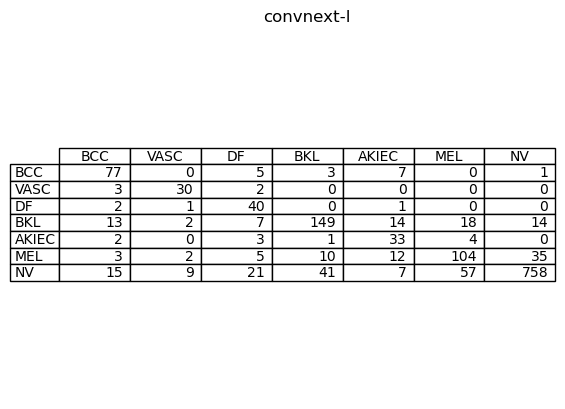

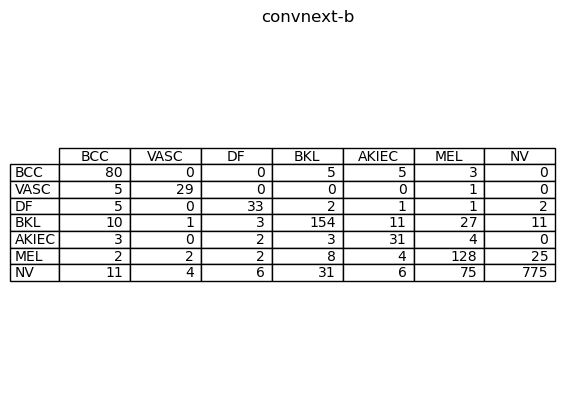

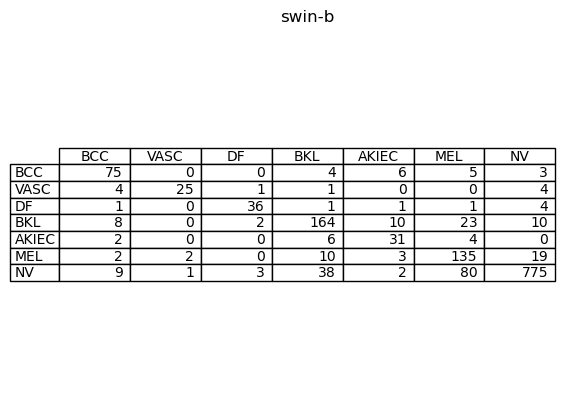

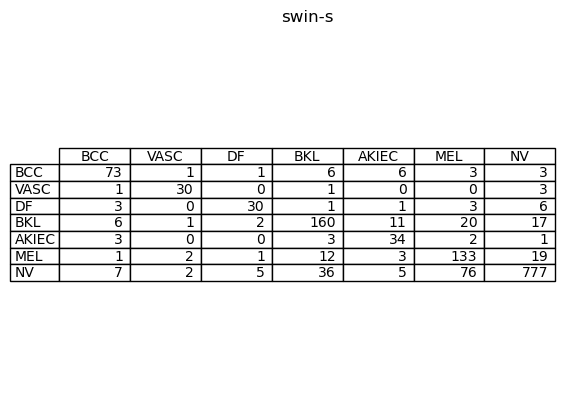

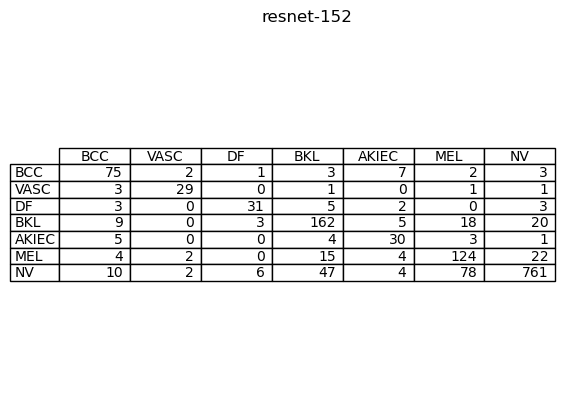

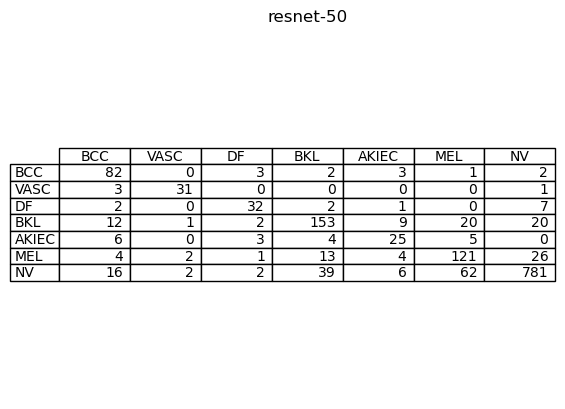

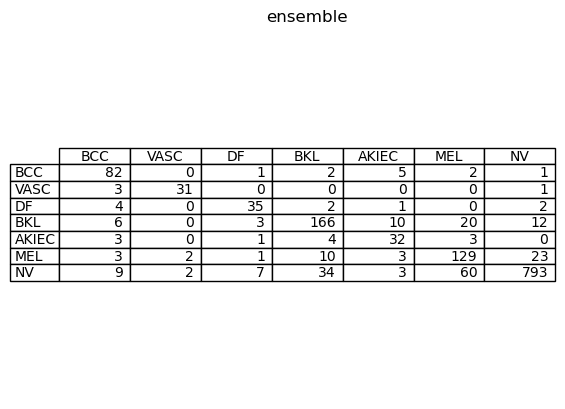

In [72]:
with open("result_6.json", "r") as infile:
    result_dict = json.load(infile)

import seaborn as sn
for model in result_dict:
    # Data for the table
    cm = np.array(result_dict[model]['confusion_matrix'])

    # Column and row labels
    columns = ['BCC', 'VASC', 'DF', 'BKL', 'AKIEC', 'MEL', 'NV']
    rows = ['BCC', 'VASC', 'DF', 'BKL', 'AKIEC', 'MEL', 'NV']

    # Create the table plot
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=cm, colLabels=columns, rowLabels=rows, loc='center')
    # sn.heatmap(cm, cmap="coolwarm", annot=True, fmt=".2f")

    ax.set_title(model)
    # Show the plot
    plt.savefig(f'figures/{model}_cm.png', dpi=1200, bbox_inches='tight')




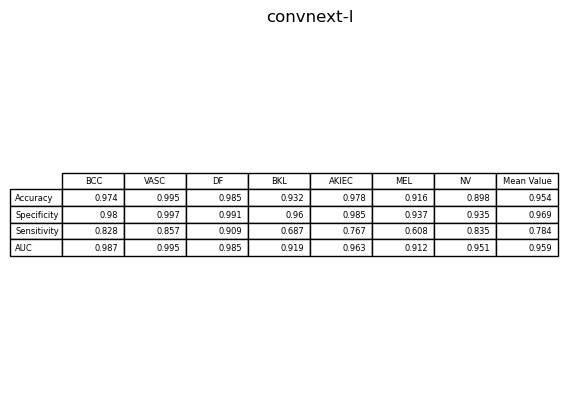

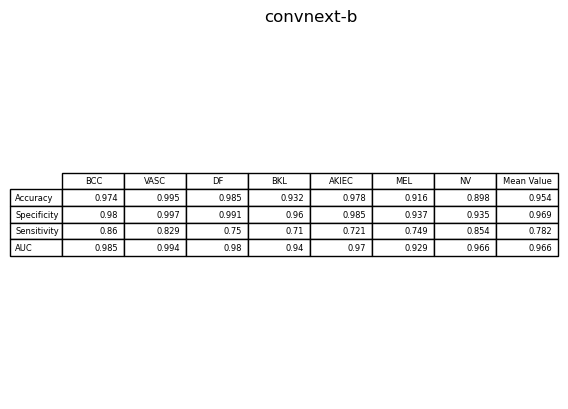

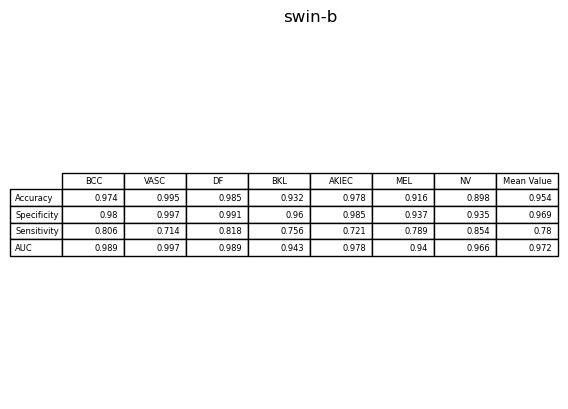

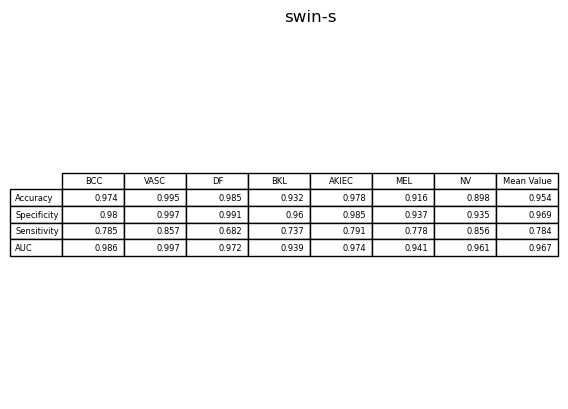

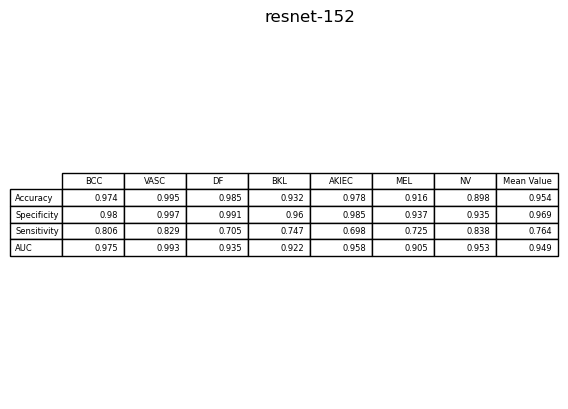

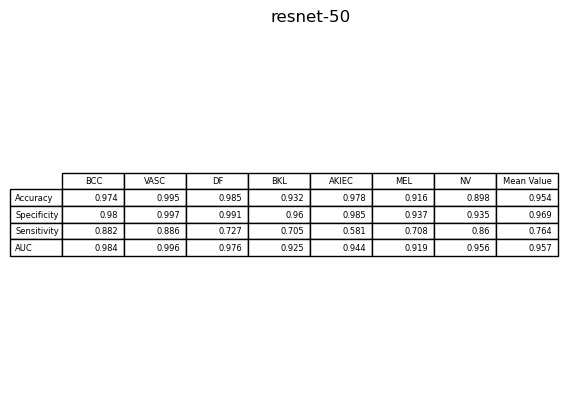

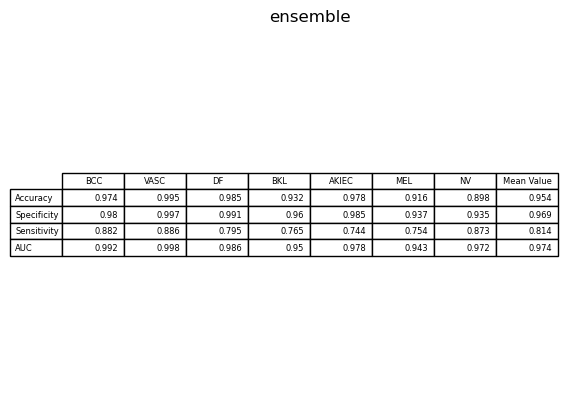

In [75]:
def specificity_per_class(confusion_matrix):
    n_classes = confusion_matrix.shape[0]
    specificities = []

    for i in range(n_classes):
        # True Negatives are the sum of all elements except the current row and column
        tn = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
        # False Positives are the sum of elements in the current column except the diagonal element
        fp = np.sum(confusion_matrix[:, i]) - confusion_matrix[i, i]
        
        specificity = tn / (tn + fp)
        specificities.append(specificity)

    return specificities

def accuracy_per_class(confusion_matrix):
    n_classes = confusion_matrix.shape[0]
    accuracy = []

    for i in range(n_classes):
        # True Negatives are the sum of all elements except the current row and column
        # fp = np.sum(confusion_matrix[:, i]) - confusion_matrix[i, i]
        # fn = np.sum(confusion_matrix[i, :]) - confusion_matrix[i, i]
        # True Positive
        tp = confusion_matrix[i, i]
        tn = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]

        accuracy.append((tp + tn) / np.sum(confusion_matrix))

    return accuracy

for model in result_dict:
    accuracy =  accuracy_per_class(cm)
    specificity = specificity_per_class(cm)
    sensitivity = result_dict[model]['per_class_accuracy'].copy()
    roc_auc = result_dict[model]['per_class_auc'].copy()

    accuracy.append(np.mean(accuracy))
    specificity.append(np.mean(specificity))
    sensitivity.append(np.mean(sensitivity))
    roc_auc.append(np.mean(roc_auc))
    text_matrix = [accuracy, specificity, sensitivity, roc_auc]

    # Column and row labels
    columns = ['BCC', 'VASC', 'DF', 'BKL', 'AKIEC', 'MEL', 'NV', 'Mean Value']
    rows = ['Accuracy', 'Specificity', 'Sensitivity', 'AUC']

    text_matrix = [[round(value, 3) for value in row] for row in text_matrix]
    # Create the table plot
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(model)
    ax.table(cellText=text_matrix, colLabels=columns, rowLabels=rows, loc='center')

    # Show the plot
    plt.savefig(f'figures/{model}_metric_table.png', dpi=1200, bbox_inches='tight')


## ROC Curve

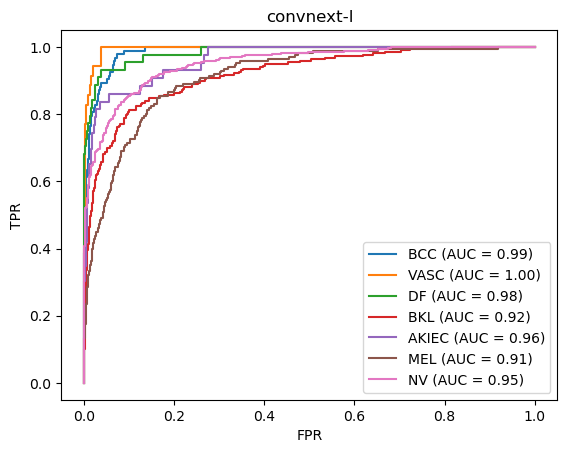

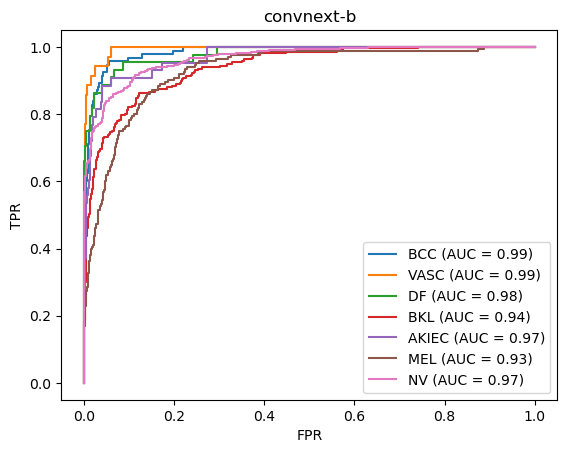

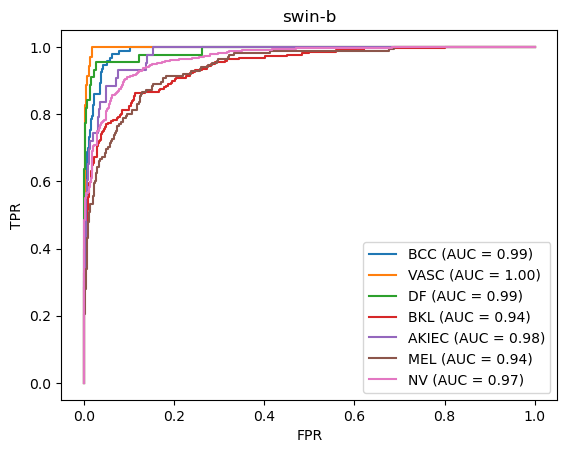

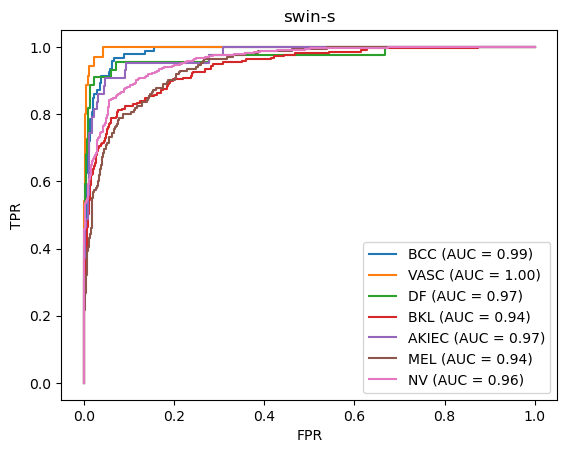

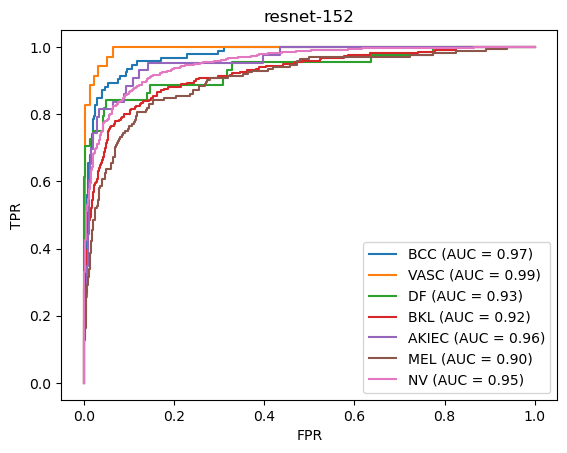

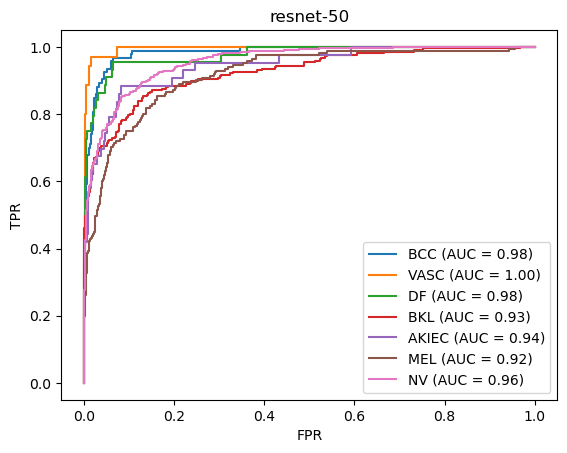

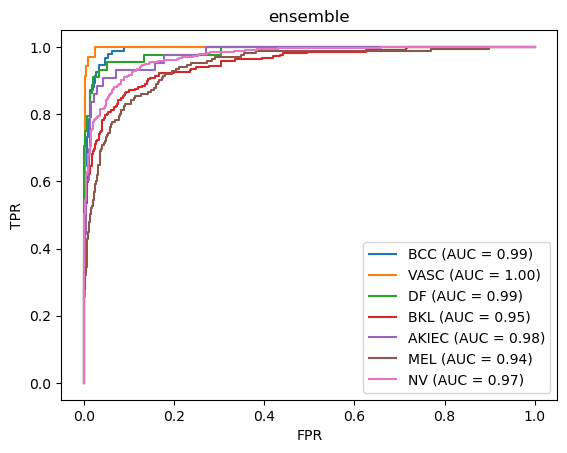

In [76]:
for model in result_dict:
    fpr = result_dict[model]['fpr']
    tpr = result_dict[model]['tpr']
    roc_auc = result_dict[model]['per_class_auc']
    num_classes = 7

    fig, ax = plt.subplots()
    for i in range(num_classes):
        ax.plot(fpr[str(i)], tpr[str(i)], label=f'{idx_class_map[i]} (AUC = {roc_auc[i]:.2f})')

    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend()
    ax.set_title(model)
    plt.savefig(f'figures/{model}_roc.png', dpi=1200, bbox_inches='tight')


## The Relation between Metadata and Cancer Type

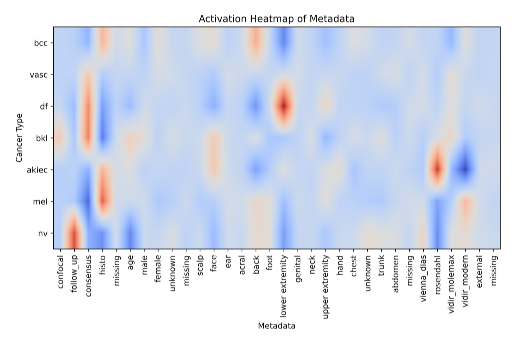

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from disk
image = mpimg.imread('figures/metadata_activation.png')

# Display the image using plt.imshow()
plt.imshow(image)
plt.axis('off')  # Remove the axis
plt.show()

## Training

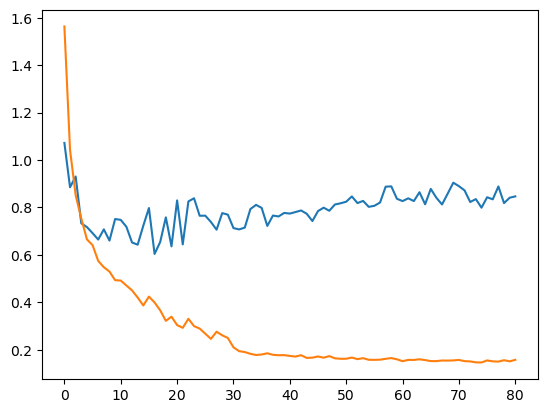

In [55]:
test_loss = [1.0721393326918285, 0.8853119909763336, 0.9306947141885757, 0.7331667778392633, 0.7173218317329884, 0.6918994213143984, 0.6648714765906334, 0.7078406599660715, 0.6604401158789793, 0.7513730054100355, 0.7477573528885841, 0.7186376030246416, 0.6525519347439209, 0.6430379692465067, 0.7232125842322906, 0.797752204661568, 0.6041979920119047, 0.6545957115789255, 0.7583404605587324, 0.6361943017691374, 0.8297778150687615, 0.6443517797936996, 0.8255619977911314, 0.838935607423385, 0.7651640089849631, 0.7654837543765703, 0.7387470193207264, 0.7064580898731947, 0.7762447769443194, 0.769857807084918, 0.7131044361740351, 0.7076217004408439, 0.7150281978150209, 0.7932926577826341, 0.8111021512498459, 0.7982124779373407, 0.7222672210385402, 0.7659373010198275, 0.762186799198389, 0.7770951216419538, 0.7742794640362263, 0.7808149817089239, 0.7874236715336641, 0.7733766691138347, 0.7428895458579063, 0.7849689001838366, 0.7992080835004648, 0.7862142194062471, 0.8125988791386286, 0.817678494999806, 0.8243818196157614, 0.8465108883877596, 0.8186119738966227, 0.8277046655615171, 0.8027440632383028, 0.807106684272488, 0.8208905930320421, 0.8877390554795662, 0.8889808356761932, 0.8367150959869226, 0.8268965190897385, 0.8386595360934734, 0.8270790670067072, 0.8643146194517612, 0.8135039539386829, 0.878321678067247, 0.840891893953085, 0.812717375655969, 0.8581947678079208, 0.9045197317997614, 0.8898682777459422, 0.8719402986268202, 0.823087086280187, 0.8353634638090929, 0.7991750972966353, 0.8430744453022877, 0.8343781437724829, 0.8887270670384169, 0.8185069290921092, 0.8411221082011858, 0.8468128399302562]
train_loss = [1.5630898623709466, 1.042778601691981, 0.8519633873632759, 0.7533446770564766, 0.6653350074389938, 0.641334678906544, 0.5747040202663203, 0.548175397667156, 0.5297423615387291, 0.4935633002003287, 0.49184797315081213, 0.47106919176639267, 0.4506884924355586, 0.4203578370866502, 0.3869529654076145, 0.4244164874789062, 0.39946980404246385, 0.366385586891964, 0.3221927167029138, 0.3397068584895438, 0.3042510012342672, 0.29273092025404523, 0.33076693924369327, 0.2998996375567594, 0.28953798642014245, 0.26802232192390285, 0.24600070567837187, 0.27634703092704155, 0.26120237218346565, 0.2498072228234285, 0.21037774314736105, 0.19428593670106997, 0.19066681781676925, 0.18309981466098957, 0.1780225354347639, 0.18025822035825936, 0.1853207290694592, 0.17895839484349177, 0.1772265109903873, 0.17755983869551092, 0.1741665671965119, 0.17157714721408618, 0.17729149393405125, 0.16577547643879417, 0.16692174695859288, 0.17191719318366355, 0.1667425026701894, 0.1734480502404225, 0.16412564867715926, 0.16218934295948145, 0.16233589794415576, 0.16729178099305766, 0.16071858883473525, 0.16477653025916428, 0.15789896589080998, 0.15768035109730283, 0.1583525608916571, 0.16207103462071176, 0.16514900134532315, 0.15994300157021565, 0.15206210355565047, 0.15741940900968138, 0.15727951441695737, 0.16005921736359596, 0.15663086570751894, 0.15247549085765127, 0.15232875117450762, 0.1549039318872865, 0.15452133007584865, 0.1552360324770402, 0.15730233632834853, 0.15220568134526538, 0.1511287319052751, 0.14707675718577803, 0.14659302722022033, 0.15518062466838559, 0.15141027499061482, 0.1502988712897726, 0.15619035508887025, 0.15130015246712478, 0.15782041007735928]

plt.plot(range(len(test_loss)), test_loss)
plt.plot(range(len(train_loss)), train_loss)